### Importing Packages

In [12]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors, rdMolDescriptors
import numpy as np
from collections import defaultdict
from tqdm.notebook import tqdm
import torch

In [14]:
# CHEMBl SDF file containing molecules
sdf_file = "chembl_35.sdf"
num_to_extract = 1000 

supplier = Chem.SDMolSupplier(sdf_file)

In [16]:
# This will probably take a few minutes
print("Number of molecules", len(supplier))

Number of molecules 2474590


Defining Properties

In [17]:
def prop_from_smiles(mol):
    """Extract comprehensive properties from an RDKit molecule"""
    if mol is None:
        return None
    
    properties = {}
    
    # Basic molecular properties

    properties['SMILES'] = Chem.MolToSmiles(mol)
    properties['Molecular_Formula'] = Chem.rdMolDescriptors.CalcMolFormula(mol)
    properties['Molecular_Weight'] = Descriptors.MolWt(mol)
    properties['Heavy_Atom_Count'] = mol.GetNumHeavyAtoms()
    properties['Atom_Count'] = mol.GetNumAtoms()
    properties['Bond_Count'] = mol.GetNumBonds()
    properties['Ring_Count'] = rdMolDescriptors.CalcNumRings(mol)
    properties['Aromatic_Ring_Count'] = rdMolDescriptors.CalcNumAromaticRings(mol)
    
    # Drug-likeness
    properties['LogP'] = Descriptors.MolLogP(mol)
    
    return properties


In [18]:
properties = []

num_to_extract = 1000
counts = 0


print("Extracting molecular properties")
count = 0
for mol in tqdm(supplier, desc="Processing molecules", total=num_to_extract):
    if mol is None:
        continue
    
    mol_props = prop_from_smiles(mol)
    if mol_props:
        properties.append(mol_props)
        
    
    count += 1
    if count >= num_to_extract:
        break

# Create DataFrame
mol_prop_df = pd.DataFrame(properties)

Extracting molecular properties


Processing molecules:   0%|          | 0/1000 [00:00<?, ?it/s]

In [11]:
mol_prop_df

,SMILES,Molecular_Formula,Molecular_Weight,Heavy_Atom_Count,Atom_Count,Bond_Count,Ring_Count,Aromatic_Ring_Count,LogP
0,Cc1cc(-c2csc(N=C(N)N)n2)cn1C,C10H13N5S,235.316,16,16,17,2,2,1.36192
1,CC[C@H](C)[C@H](NC(=O)[C@H](CC(C)C)NC(=O)[C@@H...,C123H212N44O34S,2883.390,202,202,204,3,1,-16.66110
2,CCCC[C@@H]1NC(=O)[C@@H](NC(=O)[C@H](CC(C)C)NC(...,C160H268N50O41,3548.213,251,251,254,4,3,-12.19580
3,CC(C)C[C@@H]1NC(=O)CNC(=O)[C@H](c2ccc(O)cc2)NC...,C124H154ClN21O39,2598.157,185,185,196,12,9,-5.58640
4,Brc1cccc(Nc2ncnc3ccncc23)c1NCCN1CCOCC1,C19H21BrN6O,429.322,27,27,30,4,3,3.27500
...,...,...,...,...,...,...,...,...,...
995,COc1ccc(/C=C/C(=O)O[C@@H]2[C@H](O)[C@@H](O[C@@...,C70H104O32,1457.570,102,102,112,11,1,-2.22740
996,Cc1cn([C@@H]2O[C@@]3(COP(O)(=S)O[C@H]4[C@H]5OC...,C140H176N49O83P13S13,4692.741,298,298,334,37,19,-14.80060
997,N=C(N)N1CCC[C@H]1Cc1nc(-c2ccc(Nc3nc(-c4cccc(F)...,C23H22FN7OS,463.542,33,33,37,5,4,4.64317
998,Cl.Clc1cccc2nn(N=C3NCCN3)cc12,C10H11Cl2N5,272.139,17,17,18,3,2,1.42340


Visualizing some of the molecules

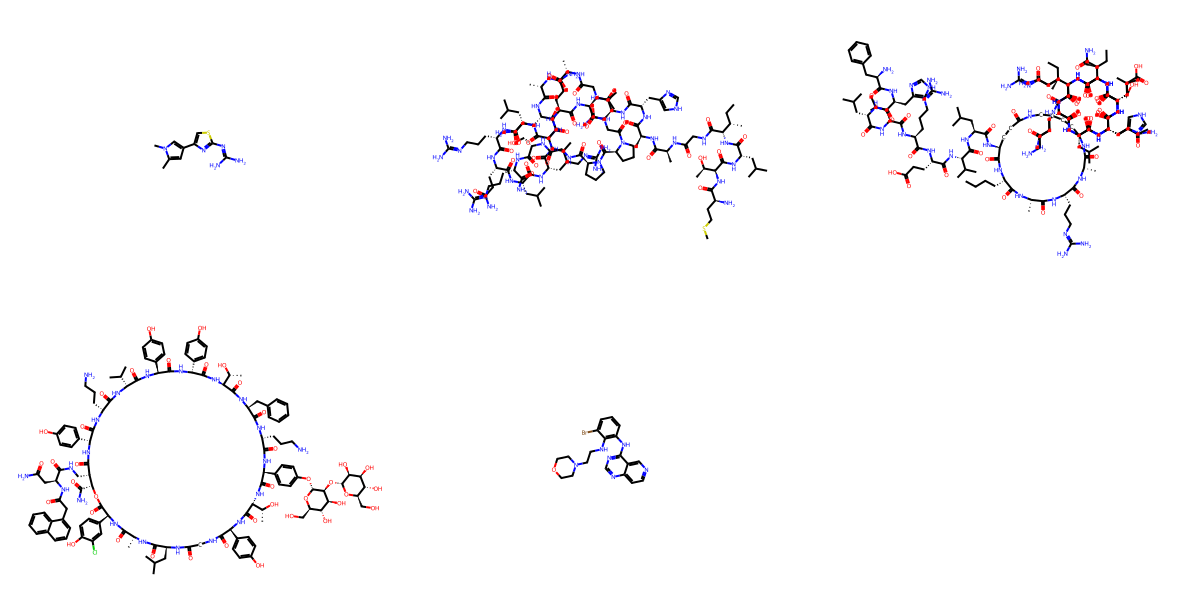

In [19]:
from rdkit.Chem import Draw

example_mols = [Chem.MolFromSmiles(smiles) for smiles in mol_prop_df[:5]['SMILES']]

img = Draw.MolsToGridImage(example_mols, molsPerRow=3, subImgSize=(400,300))
img

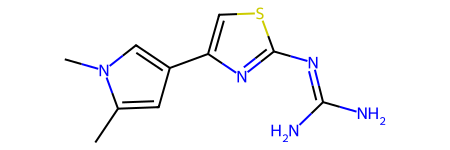

In [27]:
example_mols[0]

In [29]:
type(example_mols[0])

rdkit.Chem.rdchem.Mol

Explore atom and bond properties of molecule

In [42]:
# get list of atoms
example_atoms = example_mols[0].GetAtoms()
# print atoms and properties
for a in example_atoms:
    # atomic number
    print(a.GetAtomicNum())
    # formal charge
    print(a.GetFormalCharge())
    # degree
    print(a.GetDegree())
    # in Ring
    print(a.IsInRing())

# get list of bonds
example_bonds = example_mols[0].GetBonds()
# print a view bond properties
for b in example_bonds:
    print('{0} -> {1}'.format(b.GetBeginAtomIdx(), b.GetEndAtomIdx()))
    print('Bond type: {0}'.format(b.GetBondType()))

6
0
1
False
6
0
3
True
6
0
2
True
6
0
3
True
6
0
3
True
6
0
2
True
16
0
2
True
6
0
3
True
7
0
2
False
6
0
3
False
7
0
1
False
7
0
1
False
7
0
2
True
6
0
2
True
7
0
3
True
6
0
1
False
0 -> 1
Bond type: SINGLE
1 -> 2
Bond type: AROMATIC
2 -> 3
Bond type: AROMATIC
3 -> 4
Bond type: SINGLE
4 -> 5
Bond type: AROMATIC
5 -> 6
Bond type: AROMATIC
6 -> 7
Bond type: AROMATIC
7 -> 8
Bond type: SINGLE
8 -> 9
Bond type: DOUBLE
9 -> 10
Bond type: SINGLE
9 -> 11
Bond type: SINGLE
7 -> 12
Bond type: AROMATIC
3 -> 13
Bond type: AROMATIC
13 -> 14
Bond type: AROMATIC
14 -> 15
Bond type: SINGLE
14 -> 1
Bond type: AROMATIC
12 -> 4
Bond type: AROMATIC


Turn into graph data using pytorch geometric

In [62]:
import torch
from torch_geometric.data import Data
import torch_geometric

# define encoding of bond type
BOND_TYPE = {
    "SINGLE": 0,
    "DOUBLE": 1,
    "TRIPLE": 2,
    "AROMATIC": 3
}

def graph_from_smiles(mol: Chem.rdchem.Mol) -> Data:
    """Generate graph data from molecules and return as a torch_geometric object"""
    # atoms are edges and features for now are only the atomic number and degree
    node_features = []
    edge_features = []
    edge_indices = []
    # loop over atoms and add them as nodes
    for a in mol.GetAtoms():
        node_features.append([
            a.GetAtomicNum(),
            a.GetDegree(),
        ])
    # bonds are edges with their connections defined as index pairs of edges and bond_type as features
    # loop over bonds and add their features and indices
    for b in mol.GetBonds():
        # append bond type twice because we have to add edge twice to make the graph undirectional
        edge_features.append(BOND_TYPE[str(b.GetBondType()).upper()])
        edge_features.append(BOND_TYPE[str(b.GetBondType()).upper()])
        edge_indices.append((b.GetBeginAtomIdx(), b.GetEndAtomIdx()))
        edge_indices.append((b.GetEndAtomIdx(), b.GetBeginAtomIdx()))

    # generate graph object and return it
    x = torch.tensor(node_features, dtype=torch.float)
    e = torch.tensor(edge_indices, dtype=torch.long).t().contiguous()
    e_features = torch.tensor(edge_features, dtype=torch.float)
    return Data(x=x, edge_index=e, edge_attr=e_features)

In [64]:
example_graph = graph_from_smiles(example_mols[0])

Visualize graph

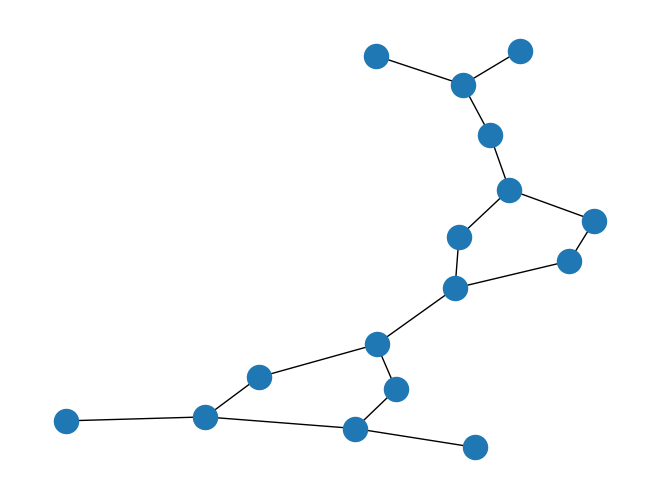

In [66]:
import networkx as nx

g = torch_geometric.utils.to_networkx(example_graph, to_undirected=True)
nx.draw(g)

# Datasets
Look at datasets from "Dive into Graphs" https://diveintographs.readthedocs.io/en/latest/index.html

In [3]:
from dig.xgraph.dataset import MoleculeDataset, SynGraphDataset, SentiGraphDataset, BA_LRP

In [49]:
list(MoleculeDataset.names.keys())

['mutag',
 'esol',
 'freesolv',
 'lipo',
 'pcba',
 'muv',
 'hiv',
 'bace',
 'bbbp',
 'tox21',
 'toxcast',
 'sider',
 'clintox']

In [51]:
list(SynGraphDataset.names.keys())

['ba_shapes', 'ba_community', 'tree_grid', 'tree_cycle', 'ba_2motifs']

In [5]:
dataset = MoleculeDataset(root='./datasets', name='bace')

Processing...
Done!


UnpicklingError: Weights only load failed. This file can still be loaded, to do so you have two options, [1mdo those steps only if you trust the source of the checkpoint[0m. 
	(1) In PyTorch 2.6, we changed the default value of the `weights_only` argument in `torch.load` from `False` to `True`. Re-running `torch.load` with `weights_only` set to `False` will likely succeed, but it can result in arbitrary code execution. Do it only if you got the file from a trusted source.
	(2) Alternatively, to load with `weights_only=True` please check the recommended steps in the following error message.
	WeightsUnpickler error: Unsupported global: GLOBAL torch_geometric.data.data.DataEdgeAttr was not an allowed global by default. Please use `torch.serialization.add_safe_globals([torch_geometric.data.data.DataEdgeAttr])` or the `torch.serialization.safe_globals([torch_geometric.data.data.DataEdgeAttr])` context manager to allowlist this global if you trust this class/function.

Check the documentation of torch.load to learn more about types accepted by default with weights_only https://pytorch.org/docs/stable/generated/torch.load.html.